In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Connect to the database
conn = sqlite3.connect('../youbike_data.db')

In [2]:
# Load data into a DataFrame
def load_data():
    query = '''
        SELECT sno, sna, mday, available_rent_bikes, available_return_bikes, latitude, longitude, total, snaen
        FROM youbike_data
        ORDER BY mday
    '''
    df = pd.read_sql_query(query, conn)
    # Convert mday to datetime for easier plotting
    df['mday'] = pd.to_datetime(df['mday'])
    return df


In [3]:
# Visualization 1: Available Bikes Over Time for Selected Stations
def plot_available_bikes(df, station_ids):
    plt.figure(figsize=(12, 6))
    for station in station_ids:
        station_data = df[df['sno'] == station]
        plt.plot(station_data['mday'], station_data['available_rent_bikes'], label=station_data['snaen'].iloc[0])
    
    plt.xlabel("Time")
    plt.ylabel("Available Rent Bikes")
    plt.title("Available Bikes Over Time")
    plt.legend(loc="upper right")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Adjust interval for fewer ticks
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.gcf().autofmt_xdate()  # Auto-adjust x-axis labels
    plt.show()


# Visualization 1: Available Bikes Over Time for Selected Stations
def plot_available_bikes_with_total(df, station_ids):
    plt.figure(figsize=(12, 6))
    
    for station in station_ids:
        station_data = df[df['sno'] == station]
        # Plot available rent bikes
        plt.plot(station_data['mday'], station_data['available_rent_bikes'], 
                 label=f"{station_data['snaen'].iloc[0]} - Available Bikes")
        # Plot total capacity
        plt.plot(station_data['mday'], station_data['total'], 
                 linestyle='--', label=f"{station_data['snaen'].iloc[0]} - Total Capacity")
    
    plt.xlabel("Time")
    plt.ylabel("Number of Bikes")
    plt.title("Available Bikes and Total Capacity Over Time")
    plt.legend(loc="upper right", fontsize=8)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Adjust interval for fewer ticks
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.gcf().autofmt_xdate()  # Auto-adjust x-axis labels
    plt.show()


# Visualization 2: Station Heatmap of Bike Availability
def plot_station_availability(df):
    # Group data by station and get the latest available bike count
    latest_data = df.sort_values('mday').groupby('sno').last().reset_index()
    
    plt.figure(figsize=(10, 8))
    plt.scatter(latest_data['longitude'], latest_data['latitude'], 
                s=latest_data['available_rent_bikes'] * 5,  # Scale marker size
                c=latest_data['available_rent_bikes'], cmap='viridis', alpha=0.7)
    
    plt.colorbar(label="Available Rent Bikes")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Bike Availability by Station")
    plt.show()


/tmp/ipykernel_1501531/3847359793.py:15: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  plt.tight_layout()  # Adjust layout for better spacing
/home/mojoee/Development/YouBike/YouBikeLive/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


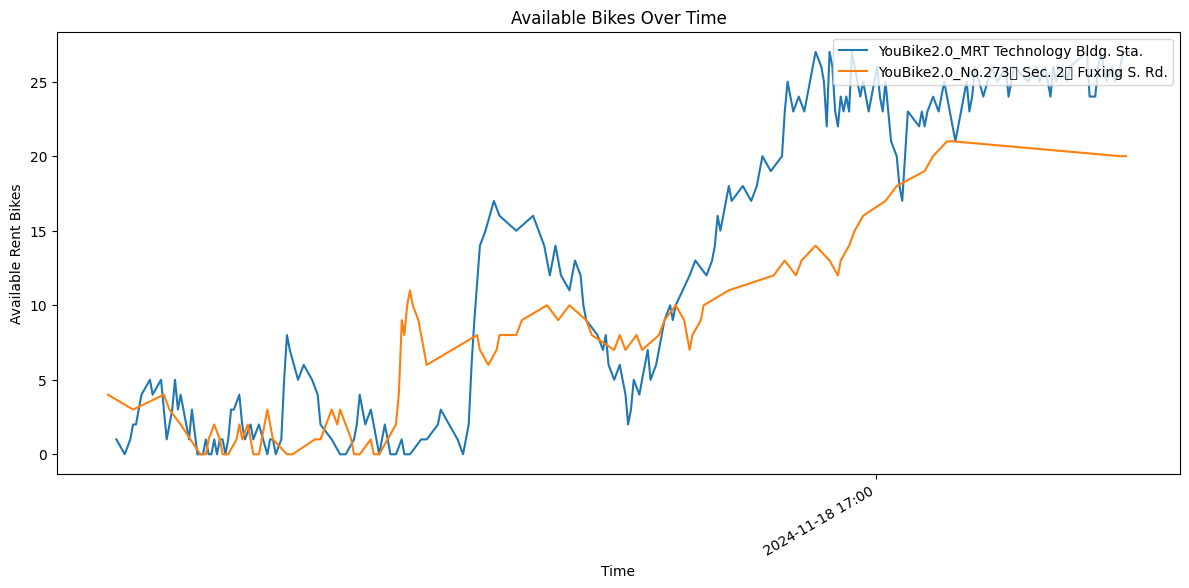

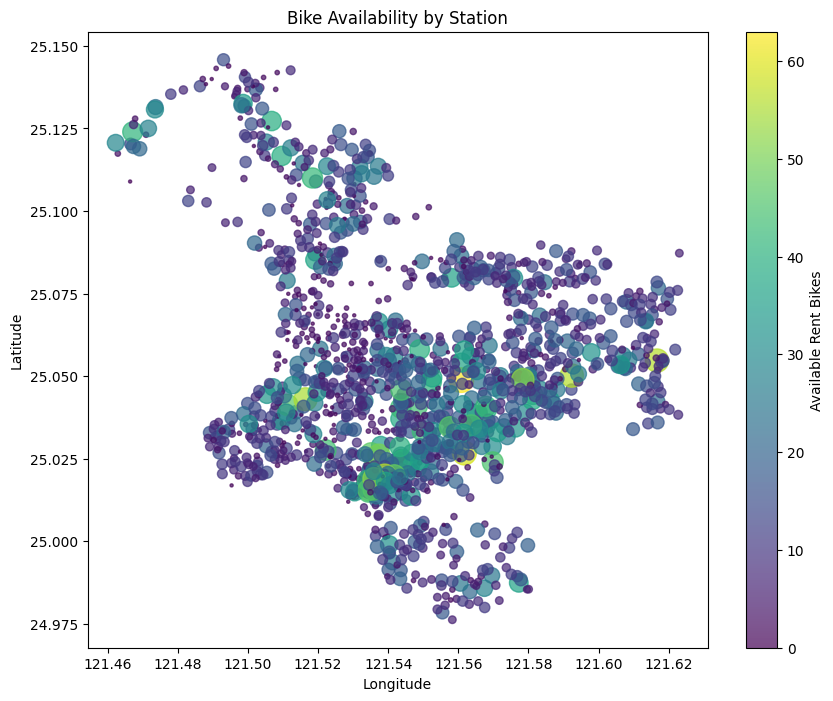

In [4]:
# Load data from database
df = load_data()

# Plot available bikes over time for selected stations (replace with station IDs you want to track)
plot_available_bikes(df, station_ids=['500101001', '500101002'])

# Plot station availability as a heatmap
plot_station_availability(df)

In [5]:
df.head()

,sno,sna,mday,available_rent_bikes,available_return_bikes,latitude,longitude,total,snaen
0,500101020,YouBike2.0_溫州停車場,2024-11-01 03:48:14,0,5,25.02093,121.53310,5,YouBike2.0_Wenzhou Parking Lot
1,500104110,YouBike2.0_海光公園南側,2024-11-01 03:49:14,0,12,25.08036,121.50840,12,YouBike2.0_Haiguang Park (South)
2,500103029,YouBike2.0_朝陽公園,2024-11-01 03:49:15,0,10,25.05592,121.51367,10,YouBike2.0_Zhaoyang Park
3,500104057,YouBike2.0_社子國小,2024-11-01 03:49:15,0,15,25.09058,121.50142,15,YouBike2.0_Shezi Elementary School
4,500105031,YouBike2.0_永安藝文館-表演36房,2024-11-01 03:49:15,0,0,24.98414,121.56907,29,YouBike2.0_Performing Arts School 36


In [6]:
# how many stations are there in Taipei currently
stations = df["sno"].unique()
len(stations)

1498

In [7]:
#make sure it matches the , check
station_names = df["sna"].unique()
len(station_names)

1498

In [8]:
# how many entries in total
len(df)

74709

In [9]:
# how many days we covered in days
len(df)/len(station_names)/6/24

0.346336782376502

In [10]:
# let's look at a unique station, for example the one at NTUST
# sno 500101024 is NTUST Main Gate
# sno 500101025 is NTUST Side Gate
# sno 500101027 is NTUST Back Gate
df.columns

Index(['sno', 'sna', 'mday', 'available_rent_bikes', 'available_return_bikes',
       'latitude', 'longitude', 'total', 'snaen'],
      dtype='object')

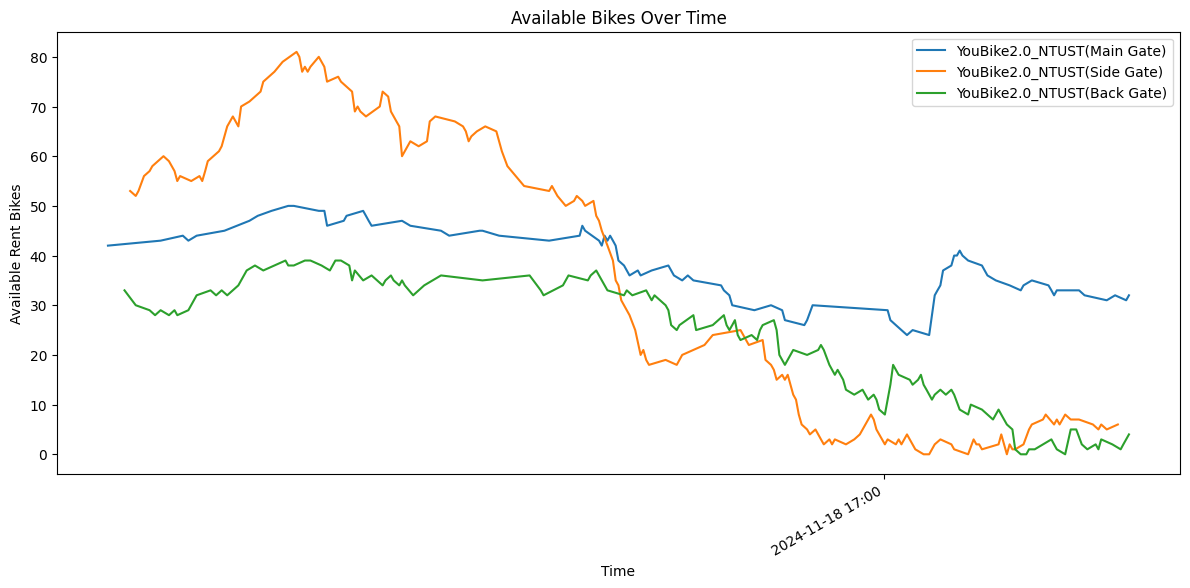

In [11]:
plot_available_bikes(df, station_ids=['500101024', '500101025', '500101027'])

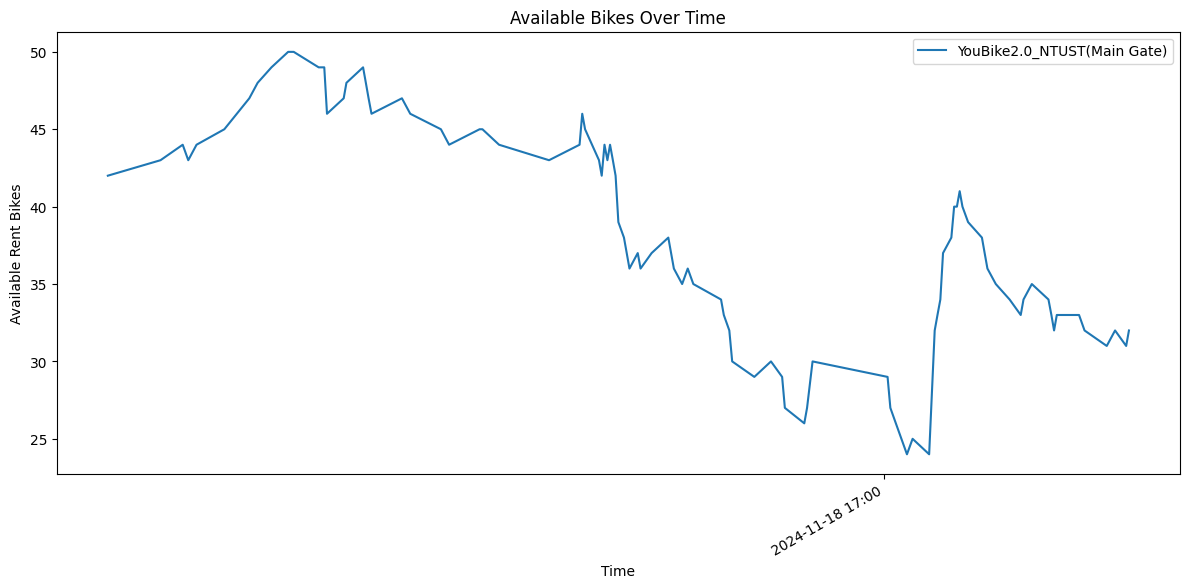

In [12]:
plot_available_bikes(df, station_ids=['500101024'])

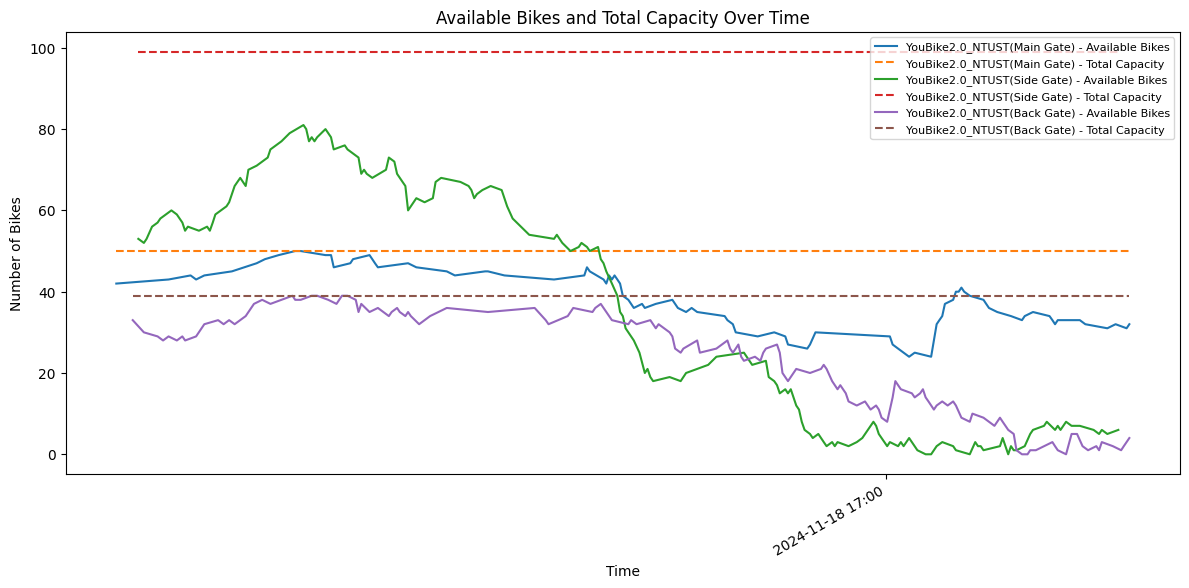

In [13]:
plot_available_bikes_with_total(df, station_ids=['500101024', '500101025', '500101027'])

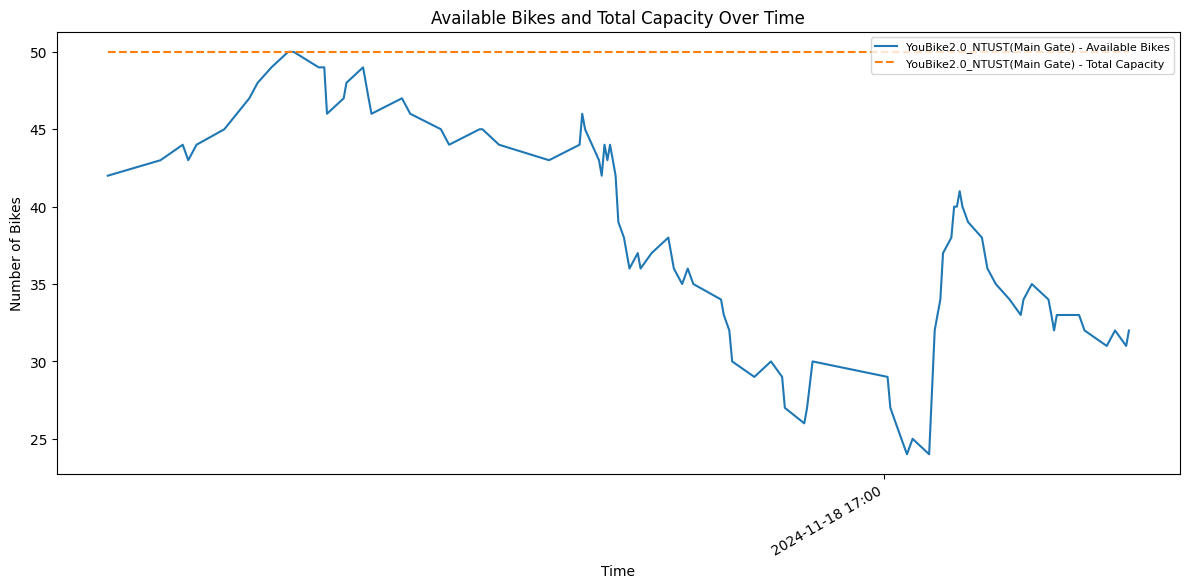

In [14]:
plot_available_bikes_with_total(df, station_ids=['500101024'])

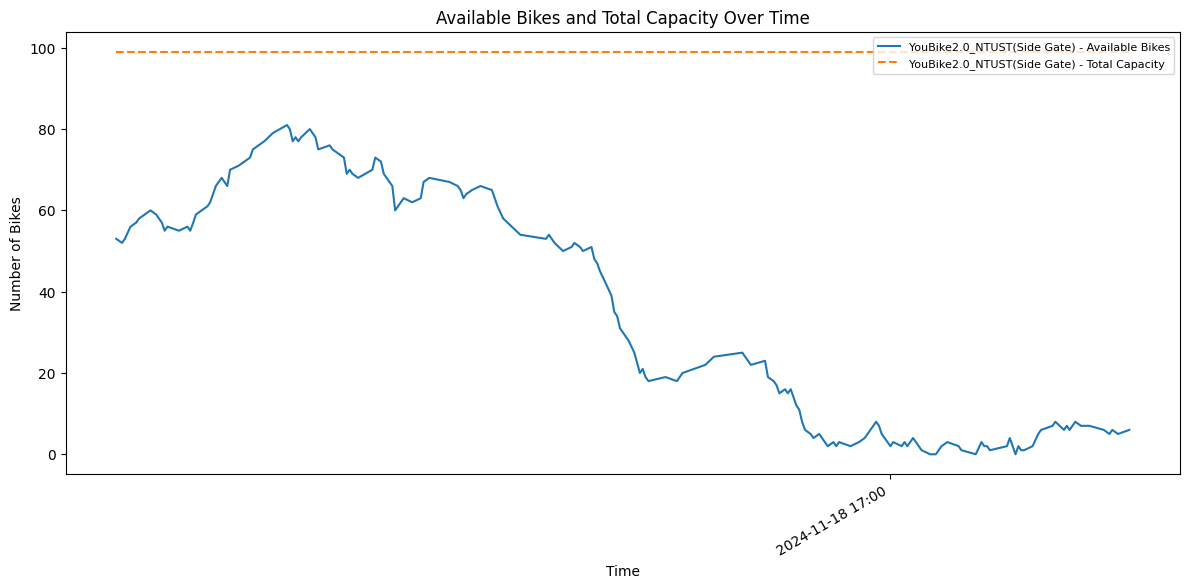

In [15]:
plot_available_bikes_with_total(df, station_ids=['500101025'])

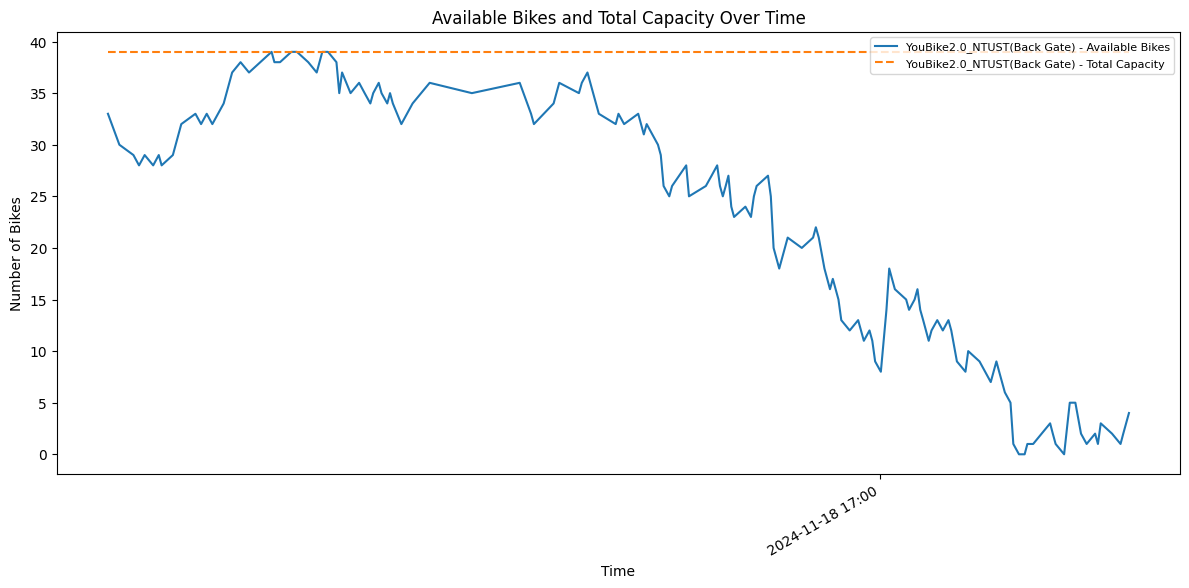

In [16]:
plot_available_bikes_with_total(df, station_ids=['500101027'])

In [19]:
# let's get some coordinates of all stations close to NTUST
df[df.sno=='500101027']

,sno,sna,mday,available_rent_bikes,available_return_bikes,latitude,longitude,total,snaen
1102,500101027,YouBike2.0_臺灣科技大學後門,2024-11-18 12:26:14,33,6,25.01182,121.54165,39,YouBike2.0_NTUST(Back Gate)
1674,500101027,YouBike2.0_臺灣科技大學後門,2024-11-18 12:30:17,30,9,25.01182,121.54165,39,YouBike2.0_NTUST(Back Gate)
2516,500101027,YouBike2.0_臺灣科技大學後門,2024-11-18 12:35:16,29,10,25.01182,121.54165,39,YouBike2.0_NTUST(Back Gate)
2863,500101027,YouBike2.0_臺灣科技大學後門,2024-11-18 12:37:15,28,11,25.01182,121.54165,39,YouBike2.0_NTUST(Back Gate)
3212,500101027,YouBike2.0_臺灣科技大學後門,2024-11-18 12:39:15,29,10,25.01182,121.54165,39,YouBike2.0_NTUST(Back Gate)
...,...,...,...,...,...,...,...,...,...
72760,500101027,YouBike2.0_臺灣科技大學後門,2024-11-18 18:22:15,2,37,25.01182,121.54165,39,YouBike2.0_NTUST(Back Gate)
73445,500101027,YouBike2.0_臺灣科技大學後門,2024-11-18 18:25:16,1,38,25.01182,121.54165,39,YouBike2.0_NTUST(Back Gate)
73660,500101027,YouBike2.0_臺灣科技大學後門,2024-11-18 18:26:14,2,37,25.01182,121.54165,39,YouBike2.0_NTUST(Back Gate)
73882,500101027,YouBike2.0_臺灣科技大學後門,2024-11-18 18:27:15,3,36,25.01182,121.54165,39,YouBike2.0_NTUST(Back Gate)


In [22]:
from geopy.distance import geodesic

# Coordinates of the target station (e.g., sno=500101027, replace with actual data)

# Keep only the latest record for each station based on `mday`
df['mday'] = pd.to_datetime(df['mday'])
df = df.sort_values('mday').drop_duplicates(subset=['sno'], keep='last')

# Coordinates of the target station (e.g., sno=500101027, replace with actual data)
target_coords = (25.01182, 121.54165)  # Replace with latitude and longitude of sno=500101027

# Function to calculate distance
def calculate_distance(row):
    station_coords = (row['latitude'], row['longitude'])
    return geodesic(target_coords, station_coords).meters

# Calculate distances
df['distance'] = df.apply(calculate_distance, axis=1)

# Exclude the target station itself (if it's part of the dataset)
df = df[df['sno'] != '500101020']  # Replace with target `sno` if present

# Get the 10 closest stations
closest_stations = df.nsmallest(10, 'distance')

# Display the results
print(closest_stations[['sno', 'sna', 'distance', 'mday', 'latitude', 'longitude']])

             sno                        sna    distance                mday  \
74080  500101027        YouBike2.0_臺灣科技大學後門    0.000000 2024-11-18 18:28:15   
73852  500101026            YouBike2.0_公館公園  115.301036 2024-11-18 18:27:14   
73222  500101025        YouBike2.0_臺灣科技大學側門  230.713458 2024-11-18 18:24:15   
71164  500101219  YouBike2.0_羅斯福路四段113巷19弄口  240.617244 2024-11-18 18:15:16   
74079  500101024        YouBike2.0_臺灣科技大學正門  298.882622 2024-11-18 18:28:15   
74281  500119081         YouBike2.0_臺大教研館北側  310.248115 2024-11-18 18:28:15   
70624  500101029          YouBike2.0_臺大環研大樓  346.006321 2024-11-18 18:13:15   
73446  500101028     YouBike2.0_臺大醫學院附設癌醫中心  347.897381 2024-11-18 18:25:16   
69675  500119062      YouBike2.0_臺大公館停車場西北側  412.109654 2024-11-18 18:08:15   
74690  500119092        YouBike2.0_臺大管理學院一館  441.450143 2024-11-18 18:30:16   

       latitude  longitude  
74080  25.01182  121.54165  
73852  25.01137  121.54062  
73222  25.01295  121.53973  
71164  25.0102

In [23]:
closest_stations[['sno', 'sna', 'latitude', 'longitude']].to_csv("closest_stations.csv")

,sno,sna,latitude,longitude
74080,500101027,YouBike2.0_臺灣科技大學後門,25.01182,121.54165
73852,500101026,YouBike2.0_公館公園,25.01137,121.54062
73222,500101025,YouBike2.0_臺灣科技大學側門,25.01295,121.53973
71164,500101219,YouBike2.0_羅斯福路四段113巷19弄口,25.01027,121.53998
74079,500101024,YouBike2.0_臺灣科技大學正門,25.01451,121.54142
74281,500119081,YouBike2.0_臺大教研館北側,25.01337,121.53909
70624,500101029,YouBike2.0_臺大環研大樓,25.01234,121.54503
73446,500101028,YouBike2.0_臺大醫學院附設癌醫中心,25.01426,121.54382
69675,500119062,YouBike2.0_臺大公館停車場西北側,25.01345,121.53798
74690,500119092,YouBike2.0_臺大管理學院一館,25.01436,121.53828
